# Instantaneous vs Time-Averaged - barely different!
I thought instantaneous windspeed would have significantly higher variance; that every acceleration would yield a high-amplitude 'spike' in instantaneous speed compared to time-averaged.
* Spikes do exist but only happen occasionally
* std_dev for a full year of data is 0.0025 higher out of 1.6325, or 0.15%. Similar results for a single month.
* correlation coef is 0.975 -> R^2 = 0.951

See timeseries plots at bottom of page.

Sidenote - inst time index is on the hour, tavg is on the half-hour.

In [9]:
import xarray as xr
from pathlib import Path

In [6]:
data_dir = Path('/mnt/c/data/merra_texas/')
data_dir.exists()

True

In [22]:
filter_ = 'MERRA2_400.tavg1_2d_slv_Nx.*.nc4'
files = list(data_dir.glob(filter_))

In [23]:
len(files)

1826

In [24]:
files == sorted(files)

True

In [25]:
land = xr.open_mfdataset(files, combine="nested", concat_dim="time", data_vars='minimal', coords='minimal', compat='no_conflicts')

In [26]:
land

,Array,Chunk
Bytes,92.73 MB,50.78 kB
Shape,"(43824, 23, 23)","(24, 23, 23)"
Count,5478 Tasks,1826 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,92.73 MB,50.78 kB
Shape,"(43824, 23, 23)","(24, 23, 23)"
Count,5478 Tasks,1826 Chunks
Type,float32,numpy.ndarray


In [31]:
filter_inst = 'MERRA2_400.inst1_2d_asm_Nx.*.nc4'
files_inst = list(data_dir.glob(filter_inst))

In [32]:
inst = xr.open_mfdataset(files_inst, combine="nested", concat_dim="time", data_vars='minimal', coords='minimal', compat='override')

In [33]:
inst

,Array,Chunk
Bytes,92.73 MB,50.78 kB
Shape,"(43824, 23, 23)","(24, 23, 23)"
Count,5478 Tasks,1826 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,92.73 MB,50.78 kB
Shape,"(43824, 23, 23)","(24, 23, 23)"
Count,5478 Tasks,1826 Chunks
Type,float32,numpy.ndarray


In [44]:
subset = dict(lat=26, lon=-106.875, time=slice('2014-1-1', '2014-12-31'))

In [45]:
sub_inst = inst.loc[subset]
sub_tavg = land.loc[subset]

In [46]:
sub_tavg['V50M']

,Array,Chunk
Bytes,35.04 kB,96 B
Shape,"(8760,)","(24,)"
Count,5843 Tasks,365 Chunks
Type,float32,numpy.ndarray


In [57]:
mag_tavg = np.sqrt(np.square(sub_tavg['V50M']) + np.square(sub_tavg['U50M']))

In [58]:
mag_tavg.std().values

array(1.6324649, dtype=float32)

In [59]:
mag_inst = np.sqrt(np.square(sub_inst['V50M']) + np.square(sub_inst['U50M']))

In [60]:
mag_inst.std().values

array(1.6349604, dtype=float32)

## Month of Data

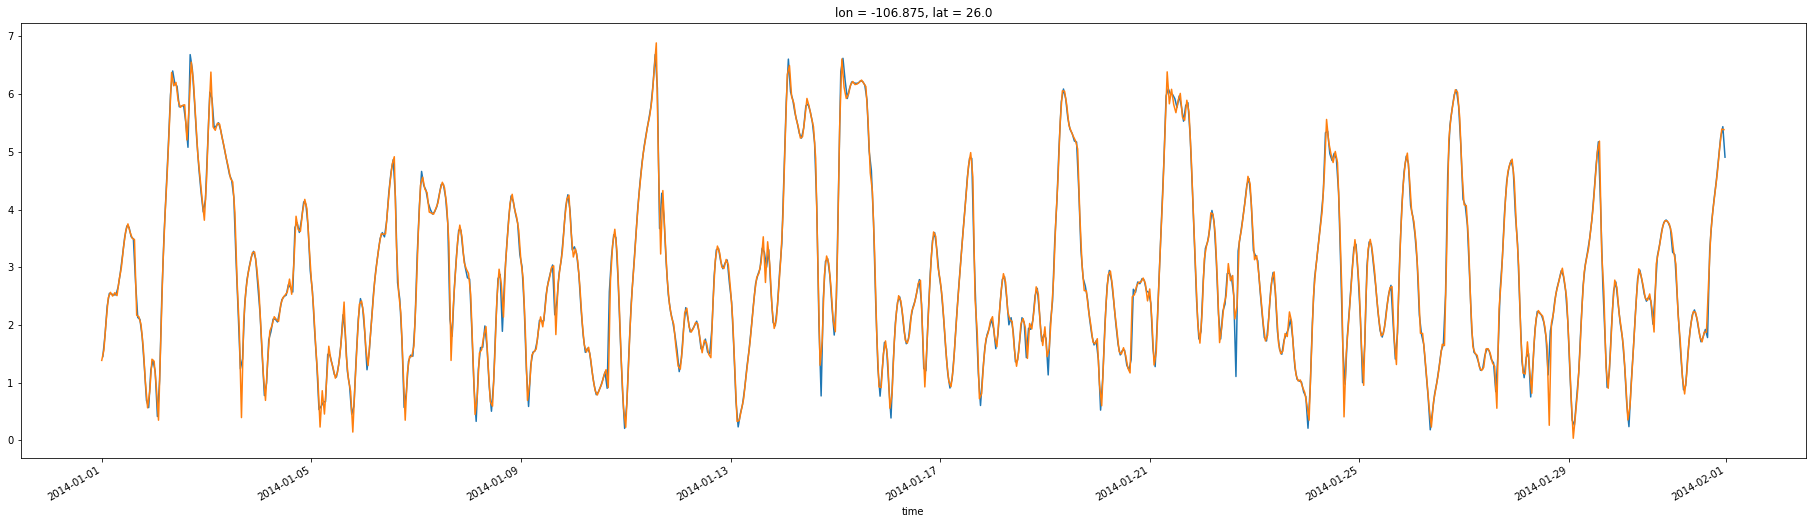

In [78]:
xr.plot.line(mag_tavg.loc['2014-1'], size=8, aspect=4)
xr.plot.line(mag_inst.loc['2014-1'])

## Day of Data

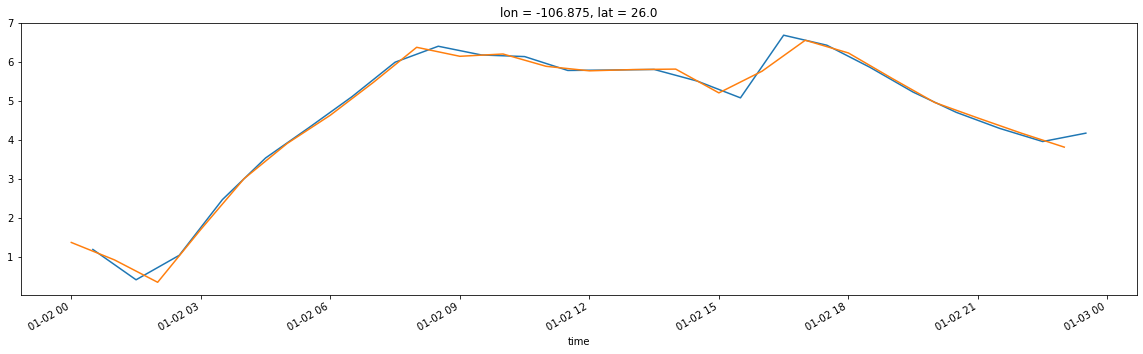

In [84]:
xr.plot.line(mag_tavg.loc['2014-1-2'], size=5, aspect=4)
xr.plot.line(mag_inst.loc['2014-1-2'])

In [79]:
np.corrcoef(mag_tavg, mag_inst)

array([[1.        , 0.97536024],
       [0.97536024, 1.        ]])

In [81]:
mag_tavg.loc['2014-1'].std().values

array(1.5071248, dtype=float32)

In [82]:
mag_inst.loc['2014-1'].std().values

array(1.5093863, dtype=float32)